In [1]:
print("yahallo")

yahallo


In [2]:
!pip install openpyxl

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_excel("../input/xss-attacks-dataset/XSS Attack Dataset with 461 entries.xlsx")
df.head()

,App Names,Permissions,API Name,Website Name,IP,Location,Label
0,XSSDetector,"INTERNET,READ_CONTACTS,ACCESS_FINE_LOCATION,AC...",getDeviceId,http://www.5riversmarketing.com/,104.243.40.3,USA - Florida,Yes
1,Attackers 2,"INTERNET,READ_CONTACTS,ACCESS_FINE_LOCATION,AC...",getSimSerialNumber,http://www.5riversmarketing.com/,104.243.40.3,USA - Florida,Yes
2,Attackers 3,"INTERNET,ACCESS_FINE_LOCATION,ACCESS_COARSE_LO...",Not Sensitive,http://www.5riversmarketing.com/,104.243.40.3,USA - Florida,No
3,Attackers 4,"INTERNET,READ_PHONE_STATE,SEND_SMS",Not Sensitive,http://demo2.5riversmarketing.com/,104.243.40.3,USA - Florida,No
4,Attackers 5,"INTERNET,READ_CONTACTS,READ_PHONE_STATE",Not Sensitive,http://www.5riversmarketing.com/,104.243.40.3,USA - Florida,No


In [5]:
print("Unique values in App Names:", len(pd.unique(df['App Names'])))
print("Unique values in Permissions:", len(pd.unique(df['Permissions'])))
print("Unique values in API Name:", len(pd.unique(df['API Name'])))
print("Unique values in Website Name:", len(pd.unique(df['Website Name'])))
print("Unique values in IP:", len(pd.unique(df['IP'])))
print("Unique values in Location:", len(pd.unique(df['Location'])))
print("Unique values in Label:", len(pd.unique(df['Label'])))

Unique values in App Names: 460
Unique values in Permissions: 27
Unique values in API Name: 39
Unique values in Website Name: 446
Unique values in IP: 447
Unique values in Location: 163
Unique values in Label: 2


In [6]:
from sklearn.preprocessing import LabelEncoder

for c in df.columns:
    if df[c].dtype=='object': 
        lbl = LabelEncoder()
        lbl.fit(list(df[c].values))
        df[c] = lbl.transform(df[c].values)
        
df.head()  

,App Names,Permissions,API Name,Website Name,IP,Location,Label
0,435,12,16,3,21,148,1
1,48,12,27,3,21,148,1
2,49,9,2,3,21,148,0
3,50,16,2,0,21,148,0
4,51,13,2,3,21,148,0


In [7]:
df.corr().abs()['Label'].sort_values(ascending = False)

Label           1.000000
API Name        0.777282
App Names       0.075896
Permissions     0.034151
Website Name    0.029288
Location        0.020264
IP              0.015536
Name: Label, dtype: float64

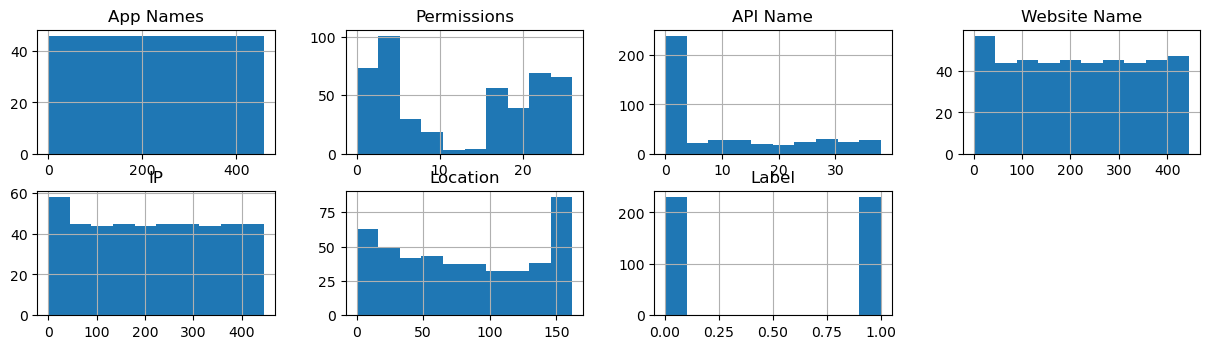

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
df.hist(layout=(5,4), figsize=(15,10))

plt.show()